# Initial data exploration

Kaggle data link: https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition/data

In [1]:
import os
from pathlib import Path


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install sktime

In [3]:
!pip check

numba 0.61.0 has requirement numpy<2.2,>=1.24, but you have numpy 1.23.4.


In [4]:
!pip show sktime

Name: sktime
Version: 0.36.0
Summary: A unified framework for machine learning with time series
Home-page: https://www.sktime.net
Author: 
Author-email: sktime developers <sktime.toolbox@gmail.com>
License: BSD 3-Clause License
        
        Copyright (c) 2019 - present, The sktime developers.
        
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contribut

In [5]:
#!pip uninstall numba
#!pip install numba --no-deps
#!pip show numba

In [6]:
from sktime.classification.kernel_based import RocketClassifier

## Data import from locally downloaded file

In [7]:
data = pd.read_csv("../raw_data/Epileptic Seizure Recognition.csv")

In [8]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Data Preprocessing

## Excluding a column with unneeded info

In [9]:
data.drop(columns=['Unnamed'], inplace=True) 


In [10]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## Leaving only data that are meaningful for NeuroPredict

In [11]:
# based on Kaggle description, I want to use only 1,2,3
data.y.value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [12]:
df = data[~data['y'].isin([4, 5])]

In [13]:
df.y.value_counts()

y
1    2300
2    2300
3    2300
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6900 entries, 1 to 11498
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 9.5 MB


## Plotting some data examples

##  Separating X, y

In [15]:
X = df.drop(columns = 'y')
y = df.y

In [16]:
X,y

(        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
 1      386  382  356  331  320  315  307  272  244  232  ...   168   164   
 7        1   -2   -8  -11  -12  -17  -15  -16  -18  -17  ...   -67   -79   
 8     -278 -246 -215 -191 -177 -167 -157 -139 -118  -92  ...  -386  -400   
 11    -167 -230 -280 -315 -338 -369 -405 -392 -298 -140  ...   415   423   
 12      92   49    0  -32  -51  -65  -37  -19  -25  -29  ...   -80   -56   
 ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
 11493 -136 -137 -138 -135 -130 -123 -116 -118 -119 -119  ...   -11    -1   
 11494  -39  -16  -13  -14  -68  -84  -92  -61  -89  -86  ...   -88  -102   
 11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
 11496  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
 11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
 
        X171  X172  X173  X174  X175  X176  X177  X178  
 1       150   14

### Some examples

(array([ 9.,  0., 90.,  0., 79.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 5 artists>)

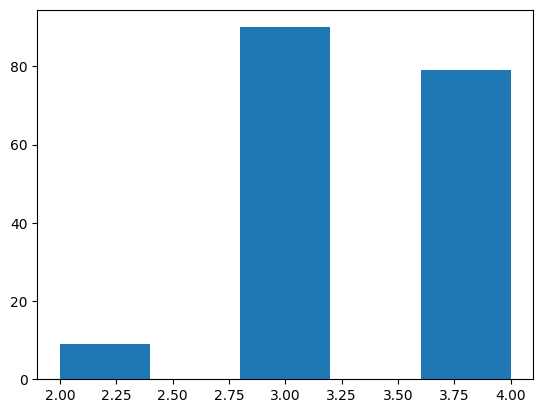

In [17]:
lengths = [len(ECG) for ECG in X]
plt.hist(lengths, bins=5)

# Here Comes ROCKET MODEL

In [18]:
from sklearn.model_selection import train_test_split
# Split the data into 70% train and 30% test, with random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Inititialize the Rocket Classfier
clf = RocketClassifier(num_kernels=1000,   #default=10,000
                       rocket_transform='rocket',  #inputs = [“rocket”, “minirocket”, “multirocket”]
                       max_dilations_per_kernel=32, 
                       n_features_per_kernel=4, 
                       use_multivariate='auto', 
                       n_jobs=-1, 
                       random_state=None)

## Data conversion for sktime 

In [35]:
def from_2d_array_to_nested(
    X, index=None, columns=None, time_index=None, cells_as_numpy=False
):
    """Convert 2D dataframe to nested dataframe.

    Convert tabular pandas DataFrame with only primitives in cells into
    nested pandas DataFrame with a single column.

    Parameters
    ----------
    X : pd.DataFrame

    cells_as_numpy : bool, default = False
        If True, then nested cells contain NumPy array
        If False, then nested cells contain pandas Series

    index : array-like, shape=[n_samples], optional (default = None)
        Sample (row) index of transformed DataFrame

    time_index : array-like, shape=[n_obs], optional (default = None)
        Time series index of transformed DataFrame

    Returns
    -------
    Xt : pd.DataFrame
        Transformed DataFrame in nested format
    """
    if (time_index is not None) and cells_as_numpy:
        raise ValueError(
            "`Time_index` cannot be specified when `return_arrays` is True, "
            "time index can only be set to "
            "pandas Series"
        )
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    container = np.array if cells_as_numpy else pd.Series

    # for 2d numpy array, rows represent instances, columns represent time points
    n_instances, n_timepoints = X.shape

    if time_index is None:
        time_index = np.arange(n_timepoints)
    kwargs = {"index": time_index}

    Xt = pd.DataFrame(
        pd.Series([container(X[i, :], **kwargs) for i in range(n_instances)])
    )
    if index is not None:
        Xt.index = index
    if columns is not None:
        Xt.columns = columns
    return Xt

# Convert your X_train to nested format (if it's a 2D array where each row is a time series)
X_train_nested = from_2d_array_to_nested(X_train)

In [36]:
# fit the model
clf.fit(X_train_nested, y_train)

ImportError: Numba needs NumPy 1.24 or greater. Got NumPy 1.23.

NotFittedError: This instance of RocketClassifier has not been fitted yet. Please call `fit` first.